# CMPT 732 - Fall 2022
# PyTorch ML Introduction

__content creator:__ Mehdi Safaee

In this tutorial, we will use PyTorch to solve a simple regression problem.

The problem is as follow:

We have a dataset consisting of 36 samples of information about houses (area, num of bedrooms, num of baths, modern/old architecture style) and their price. We want to develop a model to predict the price based on the house information.

In [5]:
import numpy as np
import torch
import pandas as pd # For handling tabular data
import matplotlib.pyplot as plt # For data visualization
from sklearn.preprocessing import MinMaxScaler # For scaling data
from sklearn.model_selection import train_test_split # For splitting the test/train subsets of the dataset

### Step 1: Importing data
In this step, we will use Pandas library to read the dataset.xlsx excel file and convert it to numpy format.

In [2]:
dataset = pd.read_excel('dataset.xlsx')
dataset.head()

Price  Sqft  Beds  Baths  Arch
0  840000  2768     4    3.5     1
1  822000  2500     4    2.5     1
2  713000  2400     3    3.0     1
3  689000  2200     3    2.5     1
4  685000  2716     3    3.5     1

In [3]:
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(36, 4)
(36, 1)


### Step 2: Normalizing data
In our dataset, some features have small values and others have large values. For better performance of the model, we need all values to lie in a specific range. We need to use the `MinMaxScaler` from the Scikit-Learn library for this purpose.

In [25]:
scalar = MinMaxScaler()


x_scaled = scalar.fit_transform(x)
y_scaled = scalar.fit_transform(y)

x_scaled = torch.Tensor(x_scaled)
y_scaled = torch.Tensor(y_scaled)

In [26]:
print(x_scaled[0:5, :])

tensor([[0.7952, 0.7500, 1.0000, 1.0000],
        [0.6841, 0.7500, 0.6000, 1.0000],
        [0.6426, 0.5000, 0.8000, 1.0000],
        [0.5597, 0.5000, 0.6000, 1.0000],
        [0.7736, 0.5000, 1.0000, 1.0000]])


### Step 3: Splitting data to test and train
We should separate a portion of the data for test time, and perform the training process only on the training portion of the data. To separate data, we will be using `train_test_split` function from the Scikit-learn library.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([27, 4])
torch.Size([27, 1])
torch.Size([9, 4])
torch.Size([9, 1])


### Step 4: PyTorch model
We will now develop a very simple model using PyTorch. Based on our data samples, we need 4 inputs and 1 output. The regression model that we want to develop will compute $price = \alpha_0*(area) + \alpha_1*(bedrooms) + \alpha_2*(baths) + \alpha_3*(modern/old) $ regression problem. The model architecture is depicted in figure_2.png

In [28]:
input_size = 4
output_size = 1
model = torch.nn.Sequential(
      torch.nn.Linear(input_size, output_size),
)

### Step 5: Optimizer and Loss function
Now we need to define a loss function and an optimizer. We need to use MSE loss function since we are dealing with a regression problem. We also will be using ADAM optimizer since it's a good default choice (we will talk about various optimizers and configurations in future lab sessions during PyTorch 3rd tutorial). In order to converge toward a solution, the optimizer will tune the model parameters (weights); thus it needs to get model parameters and a learning_rate as an input. 

In [29]:
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

### Step 6: Training loop
Now we start the training loop. We first need to put the model on `train mode`. We then will train the model for 1000 epochs. By calling loss_function, the loss in the current epoch will be calculated. By calling `loss.backward()`, the gradients will be calculated. Finally, by calling `optimizer.step()`, the model parameters will be updated using the gradients.

In [30]:
model.train()
epoch = 1000
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = loss_function(y_pred.squeeze(), y_train.squeeze())
    if epoch%100 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 1.4308326244354248
Epoch 10: train loss: 1.3648042678833008
Epoch 20: train loss: 1.3006591796875
Epoch 30: train loss: 1.2385879755020142
Epoch 40: train loss: 1.1786980628967285
Epoch 50: train loss: 1.1210262775421143
Epoch 60: train loss: 1.065565824508667
Epoch 70: train loss: 1.012284278869629
Epoch 80: train loss: 0.9611372351646423
Epoch 90: train loss: 0.9120751619338989
Epoch 100: train loss: 0.8650465607643127
Epoch 110: train loss: 0.8199978470802307
Epoch 120: train loss: 0.7768763899803162
Epoch 130: train loss: 0.7356292605400085
Epoch 140: train loss: 0.6962035298347473
Epoch 150: train loss: 0.6585466861724854
Epoch 160: train loss: 0.6226061582565308
Epoch 170: train loss: 0.5883299708366394
Epoch 180: train loss: 0.5556663870811462
Epoch 190: train loss: 0.5245640873908997
Epoch 200: train loss: 0.49497219920158386
Epoch 210: train loss: 0.46684005856513977
Epoch 220: train loss: 0.4401179552078247
Epoch 230: train loss: 0.41475605964660645
Epoch

### Step 7: Testing the model
Now, we will apply the model on the test data. We then need to rescale the output to it's original scale for better interpretablity and visualization.

In [31]:
# test the model

model.eval()
y_pred = model(x_test)

y_pred = y_pred.detach().cpu().numpy()
y_test = y_test.detach().cpu().numpy()

y_pred = scalar.inverse_transform(y_pred)
y_test = scalar.inverse_transform(y_test)

print(y_test)

[[367500.  ]
 [456999.97]
 [511000.  ]
 [372000.  ]
 [435000.  ]
 [515999.97]
 [583000.  ]
 [713000.  ]
 [569000.  ]]


### Step 8: Visualizing the model output
Finally, we can use a visualization library like Matplotlib to visualize the output data. In this case, a simple bar-plot may provide a good visualization so we can know how our model performed.

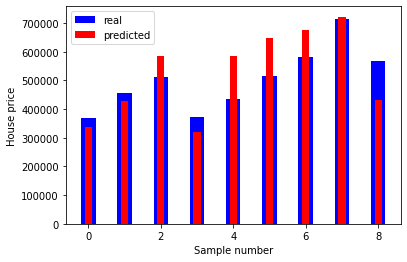

In [32]:
# plot the results
y_test = y_test.squeeze()
y_pred = y_pred.squeeze()

plt.bar(np.arange(9), y_test, color = 'blue', label = 'real', width = 0.4)
plt.bar(np.arange(9), y_pred, color = 'red', label = 'predicted', width = 0.2)
plt.xlabel("Sample number")
plt.ylabel("House price")
plt.legend()
plt.show()